In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
master = pd.read_csv("../data/master/studytime.csv")

/var/folders/41/_gkgvhb94wd4156zplzr4cg00000gn/T/ipykernel_87853/1511180618.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,0].set_yticklabels([int(y / 60) for y in ax[0,0].get_yticks()])  # Convert ticks to hours


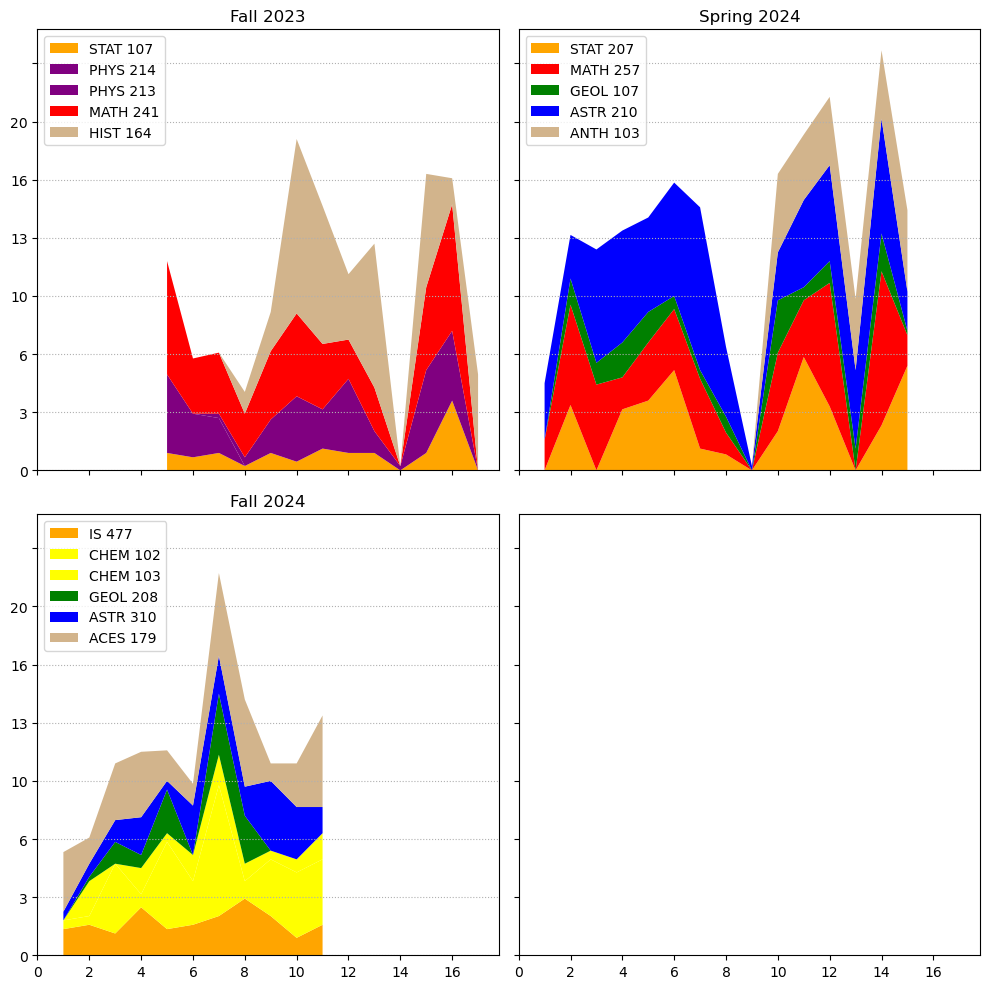

In [29]:
fig, ax = plt.subplots(2,2, figsize=[10,10], sharey=True, sharex=True)
fa23 = master[master["term"] == "fa23"].pivot(index=['term', "week", 'day of week'], columns='class', values='time spent (min)')
df1 = fa23.groupby(['week']).agg('sum')[["STAT 107", "PHYS 214", "PHYS 213", "MATH 241", "HIST 164"]]

ax[0,0].stackplot(df1.index, [df1[col] for col in df1.columns], labels=df1.columns, colors=['orange', 'purple', 'purple', 'red', 'tan'])
ax[0,0].set_yticklabels([int(y / 60) for y in ax[0,0].get_yticks()])  # Convert ticks to hours
ax[0,0].grid(axis='y', ls='dotted')
# ax[0,0].axvline(14, color='k', label="break")
ax[0,0].legend(df1.columns, loc='upper left')

sp24 = master[master["term"] == "sp24"].pivot(index=['term', "week", 'day of week'], columns='class', values='time spent (min)')
df1 = sp24.groupby(['week']).agg('sum')[[ "STAT 207","MATH 257", "GEOL 107", "ASTR 210", "ANTH 103"]]

ax[0,1].stackplot(df1.index, [df1[col] for col in df1.columns], labels=df1.columns, colors=['orange', 'red', 'green', 'blue', 'tan'])
ax[0,1].legend(df1.columns, loc='upper left')
ax[0,1].grid(axis='y', ls='dotted')

fa24 = master[master["term"] == "fa24"].pivot(index=['term', "week", 'day of week'], columns='class', values='time spent (min)')
df1 = fa24.groupby(['week']).agg('sum')[[ "IS 477", "CHEM 102", "CHEM 103", "GEOL 208", "ASTR 310", "ACES 179"]]

ax[1,0].stackplot(df1.index, [df1[col] for col in df1.columns], labels=df1.columns, colors=['orange', 'yellow', 'yellow', 'green', 'blue', 'tan'])
ax[1,0].legend(df1.columns, loc='upper left')
ax[1,0].grid(axis='y', ls='dotted')

# fig.text(0.08, 0.5, 'minutes', va='center', rotation='vertical')
# fig.text(0.515, 0.08, 'week', ha='center', rotation='horizontal')
ax[0,0].set_title("Fall 2023")
ax[0,1].set_title("Spring 2024")
ax[1,0].set_title("Fall 2024")
fig.align_xlabels()
ax[0,0].set_xticks(list(range(0,17,2)))
plt.tight_layout()
fig.savefig('../results/stackplot_by_class.png')

In [5]:
ds_group = ['STAT 107', 'STAT 207', 'IS 477']
astro_group = ['ASTR 210', 'ASTR 310']
gened_group = ['HIST 164', 'ANTH 103', 'ACES 179']
geol_group = ['GEOL 107', 'GEOL 208']
stem_foundations = ['MATH 241', 'MATH 257', 'PHYS 213', 'PHYS 214', 'CHEM 102', 'CHEM 103']

def find_group(course: str):
    if course in ds_group:
        return 'ds'
    elif course in astro_group:
        return 'astro'
    elif course in gened_group:
        return 'gened'
    elif course in geol_group:
        return 'geol'
    elif course in stem_foundations:
        return 'stem_foundations'
    else:
        return 'other'

master['group'] = master['class'].apply(lambda x: find_group(x))
df_groups = master.groupby(['term', 'week', 'day of week', 'group']).agg('sum')[['time spent (min)']].reset_index()

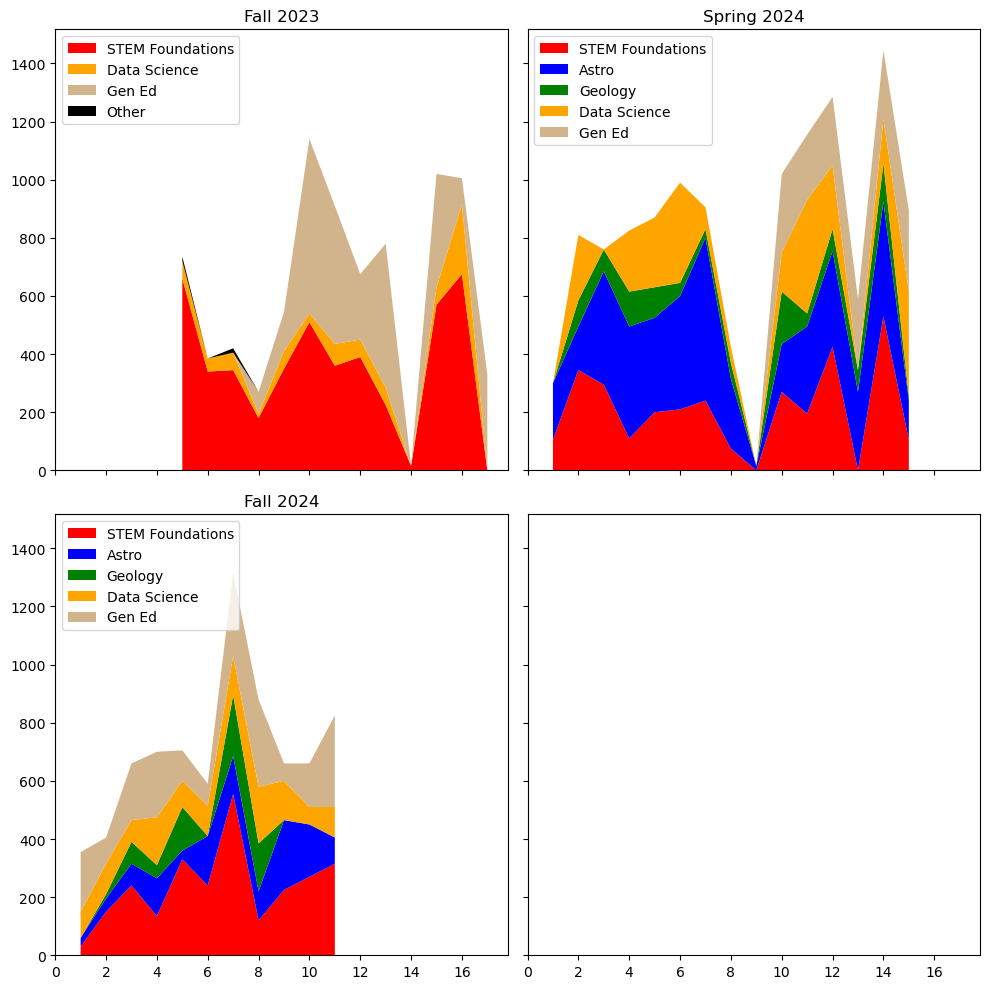

In [30]:
fig2, ax2 = plt.subplots(2,2, figsize=[10,10], sharey=True, sharex=True)

fa23 = df_groups[df_groups["term"] == "fa23"].pivot(index=['term', "week", 'day of week'], columns='group', values='time spent (min)')
df1 = fa23.groupby(['week']).agg('sum')[['stem_foundations', 'ds', 'gened', 'other']]

ax2[0,0].stackplot(df1.index, [df1[col] for col in df1.columns], colors=['red', 'orange', 'tan', 'black'])
ax2[0,0].legend(labels=["STEM Foundations", "Data Science", "Gen Ed", "Other"], loc='upper left')

sp24 = df_groups[df_groups["term"] == "sp24"].pivot(index=['term', "week", 'day of week'], columns='group', values='time spent (min)')
df1 = sp24.groupby(['week']).agg('sum')[['stem_foundations', 'astro', 'geol', 'ds', 'gened']]

ax2[0,1].stackplot(df1.index, [df1[col] for col in df1.columns], colors=['red', 'blue', 'green', 'orange', 'tan'])
ax2[0,1].legend(labels=["STEM Foundations", "Astro", "Geology", "Data Science", "Gen Ed"], loc='upper left')

fa24 = df_groups[df_groups["term"] == "fa24"].pivot(index=['term', "week", 'day of week'], columns='group', values='time spent (min)')
df1 = fa24.groupby(['week']).agg('sum')[['stem_foundations', 'astro', 'geol', 'ds', 'gened']]

ax2[1,0].stackplot(df1.index, [df1[col] for col in df1.columns], colors=['red', 'blue', 'green', 'orange', 'tan'])
ax2[1,0].legend(labels=["STEM Foundations", "Astro", "Geology", "Data Science", "Gen Ed"], loc='upper left')

# fig2.text(0.08, 0.5, 'minutes', va='center', rotation='vertical')
# fig2.text(0.515, 0.08, 'week', ha='center', rotation='horizontal')
ax2[0,0].set_title("Fall 2023")
ax2[0,1].set_title("Spring 2024")
ax2[1,0].set_title("Fall 2024")
fig2.align_xlabels()
ax2[0,0].set_xticks(list(range(0,17,2)))
plt.tight_layout()
fig2.savefig('../results/stackplot_by_group.png')

/var/folders/41/_gkgvhb94wd4156zplzr4cg00000gn/T/ipykernel_87853/2495495557.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3[1, 0].set_xticklabels(["S", "M", "T", "W", "R", "F", "S"])


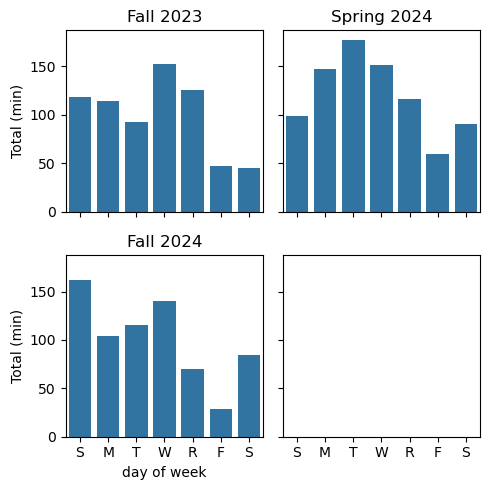

In [50]:
master["day of week"] = pd.Categorical(master["day of week"], categories=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], ordered=True)

fa23 = master[master["term"] == "fa23"].pivot(index=['term', "week", 'day of week'], columns='class', values='time spent (min)')
fa23["Total (min)"] = fa23.sum(axis=1)
sp24 = master[master["term"] == "sp24"].pivot(index=['term', "week", 'day of week'], columns='class', values='time spent (min)')
sp24["Total (min)"] = sp24.sum(axis=1)
fa24 = master[master["term"] == "fa24"].pivot(index=['term', "week", 'day of week'], columns='class', values='time spent (min)')
fa24["Total (min)"] = fa24.sum(axis=1)

fig3, ax3 = plt.subplots(2,2, figsize=[5,5], sharey=True, sharex=True)
sns.barplot(fa23, x='day of week', y='Total (min)', errorbar=('ci', False), ax=ax3[0,0])
ax3[0,0].set_title("Fall 2023")
sns.barplot(sp24, x='day of week', y='Total (min)', errorbar=('ci', False), ax=ax3[0,1])
ax3[0,1].set_title("Spring 2024")
sns.barplot(fa24, x='day of week', y='Total (min)', errorbar=('ci', False), ax=ax3[1,0])
ax3[1,0].set_title("Fall 2024")
ax3[1, 0].set_xticklabels(["S", "M", "T", "W", "R", "F", "S"])
plt.tight_layout()
fig3.savefig("../results/day_of_week_barplot.png")

In [21]:
fa23

class                  HIST 164  LAS 101  MATH 241  PHYS 213  PHYS 214  \
term week day of week                                                    
fa23 5    Friday            NaN      0.0       0.0       NaN      60.0   
          Monday            NaN      0.0      60.0       NaN       0.0   
          Saturday          NaN      0.0       0.0       NaN     150.0   
          Sunday            NaN      0.0      90.0       NaN      15.0   
          Thursday          NaN     15.0     150.0       NaN      30.0   
...                         ...      ...       ...       ...       ...   
     17   Monday            0.0      NaN       0.0       0.0       NaN   
          Saturday          0.0      NaN       0.0       0.0       NaN   
          Thursday        120.0      NaN       0.0       0.0       NaN   
          Tuesday           0.0      NaN       0.0       0.0       NaN   
          Wednesday       210.0      NaN       0.0       0.0       NaN   

class                  STAT 107  Total  
term week day of week                   
fa23 5    Friday            0.0   60.0  
          Monday            0.0   60.0  
          Saturday          0.0  150.0  
          Sunday            0.0  105.0  
          Thursday          0.0  195.0  
...                         ...    ...  
     17   Monday            0.0    0.0  
          Saturday          0.0    0.0  
          Thursday          0.0  120.0  
          Tuesday           0.0    0.0  
          Wednesday         0.0  210.0  

[83 rows x 7 columns]